

## Background and Context

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

## Objective

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

## Data Description

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc

## Data Dictionary:

- RowNumber: Row number.
- CustomerId: Unique identification key for different customers.
- Surname: Surname of the customer
- Credit Score: A credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.
- Geography: The country to which the customer belongs.
- Gender: The gender of the customer.
- Age: Age of the customer.
- Tenure: The period of time a customer has been associated with the bank.
- Balance: The account balance (the amount of money deposited in the bank account) of the customer.
- NumOfProducts: How many accounts, bank account affiliated products the person has.
- HasCrCard: Does the customer have a credit card through the bank?
- IsActiveMember: Subjective, but for the concept
- EstimatedSalary: Estimated salary of the customer.
- Exited: Did they leave the bank after all within 
6 months(0=No 1=Yes)

# Import Libraries

In [105]:
#importing tensorflow
import tensorflow as tf
print(tf.__version__)

2.5.0


In [106]:
import warnings

warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from sklearn.decomposition import PCA
import seaborn as sns
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

from sklearn.preprocessing import StandardScaler

In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



# Import data



In [108]:

#Defining the path of the dataset
project_path = '/content/drive/My Drive/AIML/Project6/'
dataset_file = project_path + 'bank.csv'

# Read in data and review samples

## Read in data


In [109]:
churn_df=pd.read_csv (dataset_file) #read in data

## Review Sample data

In [110]:
churn_df.sample(5)

RowNumber  CustomerId  Surname  ...  IsActiveMember EstimatedSalary Exited
5987       5988    15636634   Lindon  ...               0        93524.22      0
3169       3170    15688172      Tai  ...               0        88947.56      0
5562       5563    15614361     Liao  ...               1        29296.74      0
6554       6555    15632576  Yashina  ...               0        77335.75      0
1859       1860    15681956   Bailey  ...               1        65257.57      0

[5 rows x 14 columns]

**Insights:**
- RowNumber, CustomerID appear to be one to one with lines and won't provided much value. Most likely will drop
- Also, Surname most likely won't provide much information and will need dropped.
- From the sample, the data appears well populated and data is making sense

**Check Shape of Data, Check data types and number of non-null values for each column.**

In [111]:
churn_df.shape

(10000, 14)

**Insights:**
- There are 10,000 observations with 14 variables

In [112]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Insights:** 
- There appears to be no missing values
- There are three variable types, float64, int64, object

### Change the object type variables to Categorical variables for space

In [113]:
for feature in churn_df.columns: # Loop through all columns in the dataframe
    if churn_df[feature].dtype == 'object': # Only apply for columns with categorical strings
        churn_df[feature] = pd.Categorical(churn_df[feature])# Change to categorical varible
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  int64   
 1   CustomerId       10000 non-null  int64   
 2   Surname          10000 non-null  category
 3   CreditScore      10000 non-null  int64   
 4   Geography        10000 non-null  category
 5   Gender           10000 non-null  category
 6   Age              10000 non-null  int64   
 7   Tenure           10000 non-null  int64   
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  int64   
 10  HasCrCard        10000 non-null  int64   
 11  IsActiveMember   10000 non-null  int64   
 12  EstimatedSalary  10000 non-null  float64 
 13  Exited           10000 non-null  int64   
dtypes: category(3), float64(2), int64(9)
memory usage: 1001.7 KB


### Review counts of the category variables

In [114]:
for feature in churn_df.columns:
    if churn_df[feature].name in churn_df.select_dtypes(include='category').columns:
        print(churn_df[feature].value_counts())
        print('-'*30)

Smith        32
Martin       29
Scott        29
Walker       28
Brown        26
             ..
Perreault     1
Perkin        1
Percy         1
Hardacre      1
Fancher       1
Name: Surname, Length: 2932, dtype: int64
------------------------------
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
------------------------------
Male      5457
Female    4543
Name: Gender, dtype: int64
------------------------------


**Insights:**
- Surname doesn't have any last names with more than 32 observation. We will drop this variable before model building
- Our bank appears to be based in Europe due to France, Germany, Spain being the Geographies. France has more members than Germany and Spain
- There are more Males than females in the data, but not by much

In [115]:
churn_df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Insights:**
- Again, there appear to be no missing values

### Check unique values

In [116]:
churn_df.nunique() 

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

**Insights:**
- RowNumber and CustomerId are one to one with the observations and will need dropped
- Tenure, NumOfProducts are numeric, but have low amount of unique values. So they are discrete variables vs continuous

### Summary of Data

In [117]:
churn_df.describe()

RowNumber    CustomerId  ...  EstimatedSalary        Exited
count  10000.00000  1.000000e+04  ...     10000.000000  10000.000000
mean    5000.50000  1.569094e+07  ...    100090.239881      0.203700
std     2886.89568  7.193619e+04  ...     57510.492818      0.402769
min        1.00000  1.556570e+07  ...        11.580000      0.000000
25%     2500.75000  1.562853e+07  ...     51002.110000      0.000000
50%     5000.50000  1.569074e+07  ...    100193.915000      0.000000
75%     7500.25000  1.575323e+07  ...    149388.247500      0.000000
max    10000.00000  1.581569e+07  ...    199992.480000      1.000000

[8 rows x 11 columns]

**Insights:**
- CreditScore: The mean score is 650 with a range of 350 to 850. There is no skewness.
- Age: The mean age is 39 with a range of 18 to 92. There is no skewness
- Tenure: The average tenure is 5 years with a range of 0 to 10 years. There is no skewness
- Balance: The average balance is 76.5k with range of 0k to 251k. The is a a lot of variable as the standard devation is 62k
- NumOfProducts: The average customer has 1.5 products. with a range of 1 to 4.
- HasCrCard: 70.6% of members have a credit card
- IsActiveMember: 51.5% of members are active
- EstimatedSalary: The average salary is 100k with a range of 11.58 to 200k. The 11.58 looks like it could be an outlier
- Exited: 20.3% of members leave a year. This lines up with the average tenure of 5 years

In [118]:
churn_df.describe(include=['category']).T

count unique     top  freq
Surname    10000   2932   Smith    32
Geography  10000      3  France  5014
Gender     10000      2    Male  5457

**Insights:**
- Smith is the most popular surname. Thre are 2932 different Surnames
- France is the most popular Geography
- Male is the most popular gender

## Univariate analysis 

### Create Histograms and Boxplots

In [119]:
#Function to create Histogram and Boxplot
def histogram_boxplot(feature, figsize=(10,5), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, 
                                           sharex = True, 
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           )
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') 
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2)
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') 
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') 

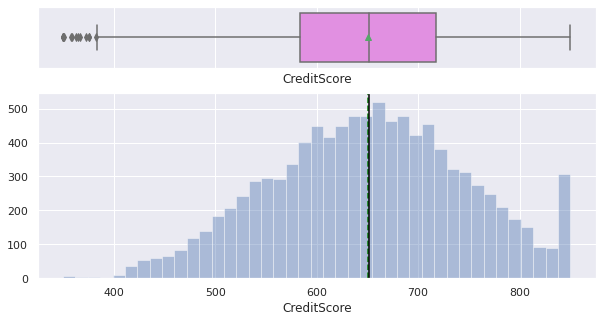

In [120]:
histogram_boxplot(churn_df['CreditScore'])

**Insights:**
- The data isn't skewed
- Able to tell that 850 is the max credit score due to the mass of members at 850
- There are a couple of outliers to lower end of the scale. Theses should be reviewed with a domain expert

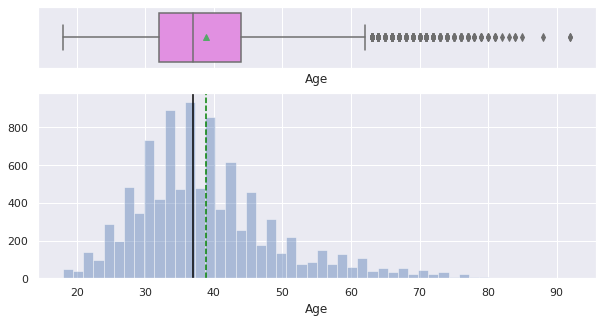

In [121]:
histogram_boxplot(churn_df['Age'])

**Insights:**
- age is slight skewed to the left
- There are several older members, but nothing that doesn't seem realistic

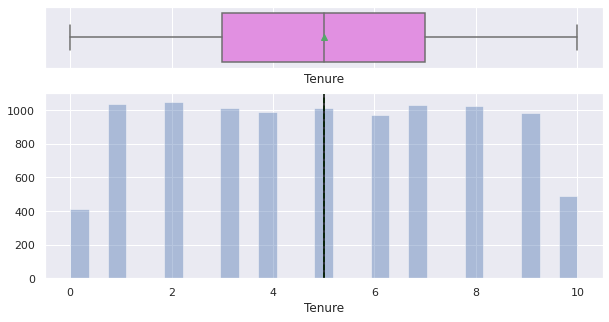

In [122]:
histogram_boxplot(churn_df['Tenure'])

**Insights:**
- Tenure is approximate uniformed in distribution 

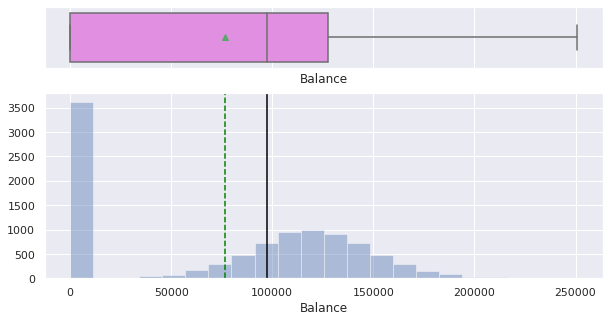

In [123]:
histogram_boxplot(churn_df['Balance'])

**Insights:**
- There are two peaks in the balance histogram 
- It might be worth looking deeper at the zero balance customers 

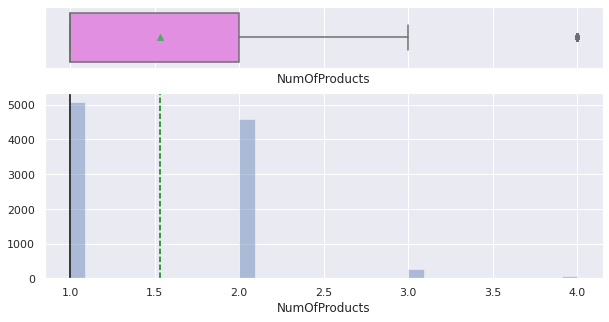

In [124]:
histogram_boxplot(churn_df['NumOfProducts'])

**Insights:**
- Most customers have 1 product
- there is an outlier at 4 products

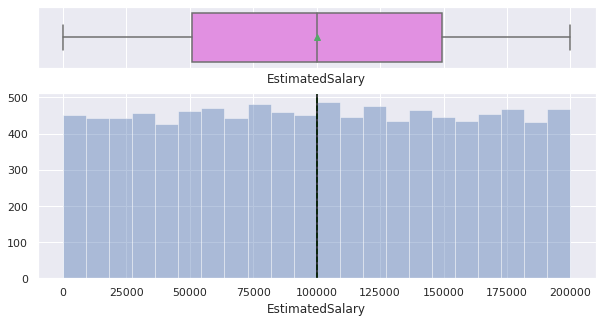

In [125]:
histogram_boxplot(churn_df['EstimatedSalary'])

**Insights:**
- Estimated Salary is close to being uniformly distributed

### CDF plot of numerical variables

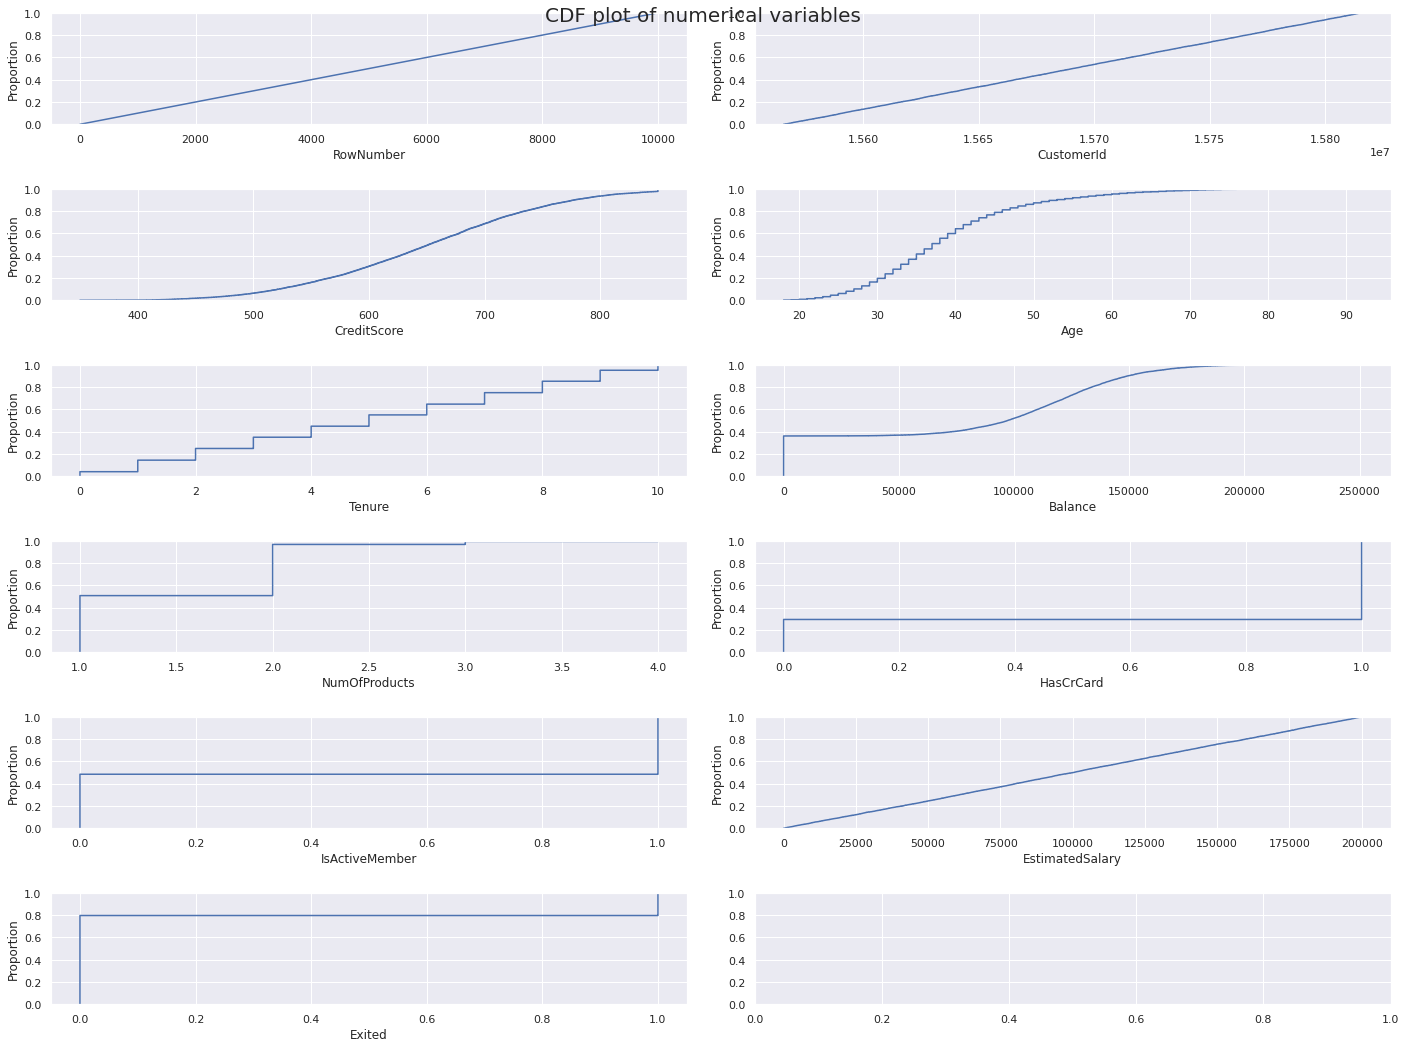

In [126]:
# select numerical columns
all_col = churn_df.select_dtypes(include=np.number).columns.tolist()

fig, axes = plt.subplots(6, 2,  figsize=(20, 15))
fig.suptitle('CDF plot of numerical variables', fontsize=20)
counter = 0
for ii in range(6):
    sns.ecdfplot(ax=axes[ii][0],x=churn_df[all_col[counter]])
    counter = counter+1
    if counter != 11:
        sns.ecdfplot(ax=axes[ii][1],x=churn_df[all_col[counter]])
        counter = counter+1
    else:
        pass


fig.tight_layout(pad=2.0)

**Insights:**

- 40% of the customers have 0 balance
- 90% of the members have less than 2 products
- Around 30%  of customers don't have a credit card

## Review Categorical Variables

**Function to create Bar Charts of percentages**

In [127]:
def perc_on_bar(feature):
 
    sns.set(rc={'figure.figsize':(9,3)})
    ax=sns.countplot(x=feature, data=churn_df)
    
    total = len(feature) 
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) 
        x = p.get_x() + p.get_width() / 2 - 0.25 
        y = p.get_y() + p.get_height()           
        ax.annotate(percentage, (x, y), size = 10) 
        
    plt.show() 

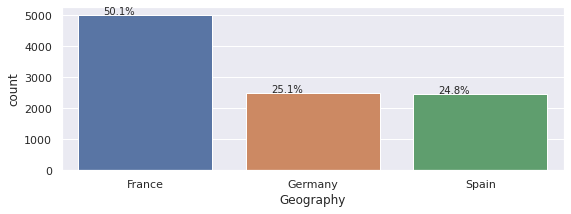

In [128]:
perc_on_bar(churn_df['Geography'])

**Insights:**
- 50% of Members are based in France

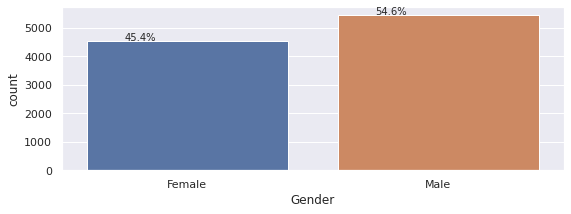

In [129]:
perc_on_bar(churn_df['Gender'])

**Insights:**
- 55% of the Customers are Male

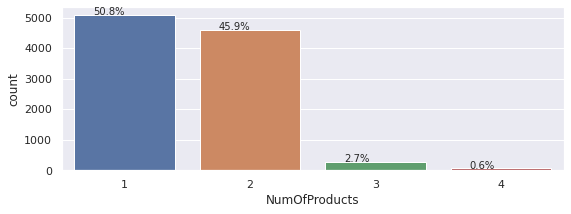

In [130]:
perc_on_bar(churn_df['NumOfProducts'])

**Insights:**
- Approximately 3.5% of customers have 3 or more products

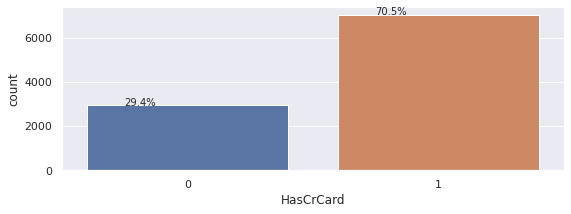

In [131]:
perc_on_bar(churn_df['HasCrCard'])

**Insights:**
- 70% of the customers have a credit card

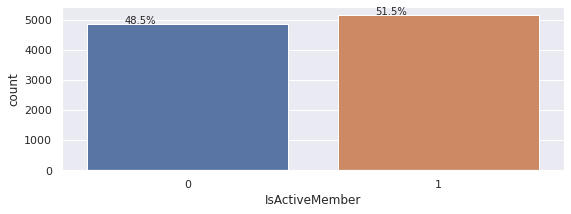

In [132]:
perc_on_bar(churn_df['IsActiveMember'])

**Insights:**
- Roughly even split if a member is active or not

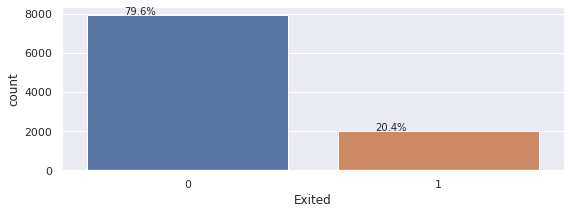

In [133]:
perc_on_bar(churn_df['Exited'])

**Insights:**
- 20% of members exit a year

### Bivariate analysis 

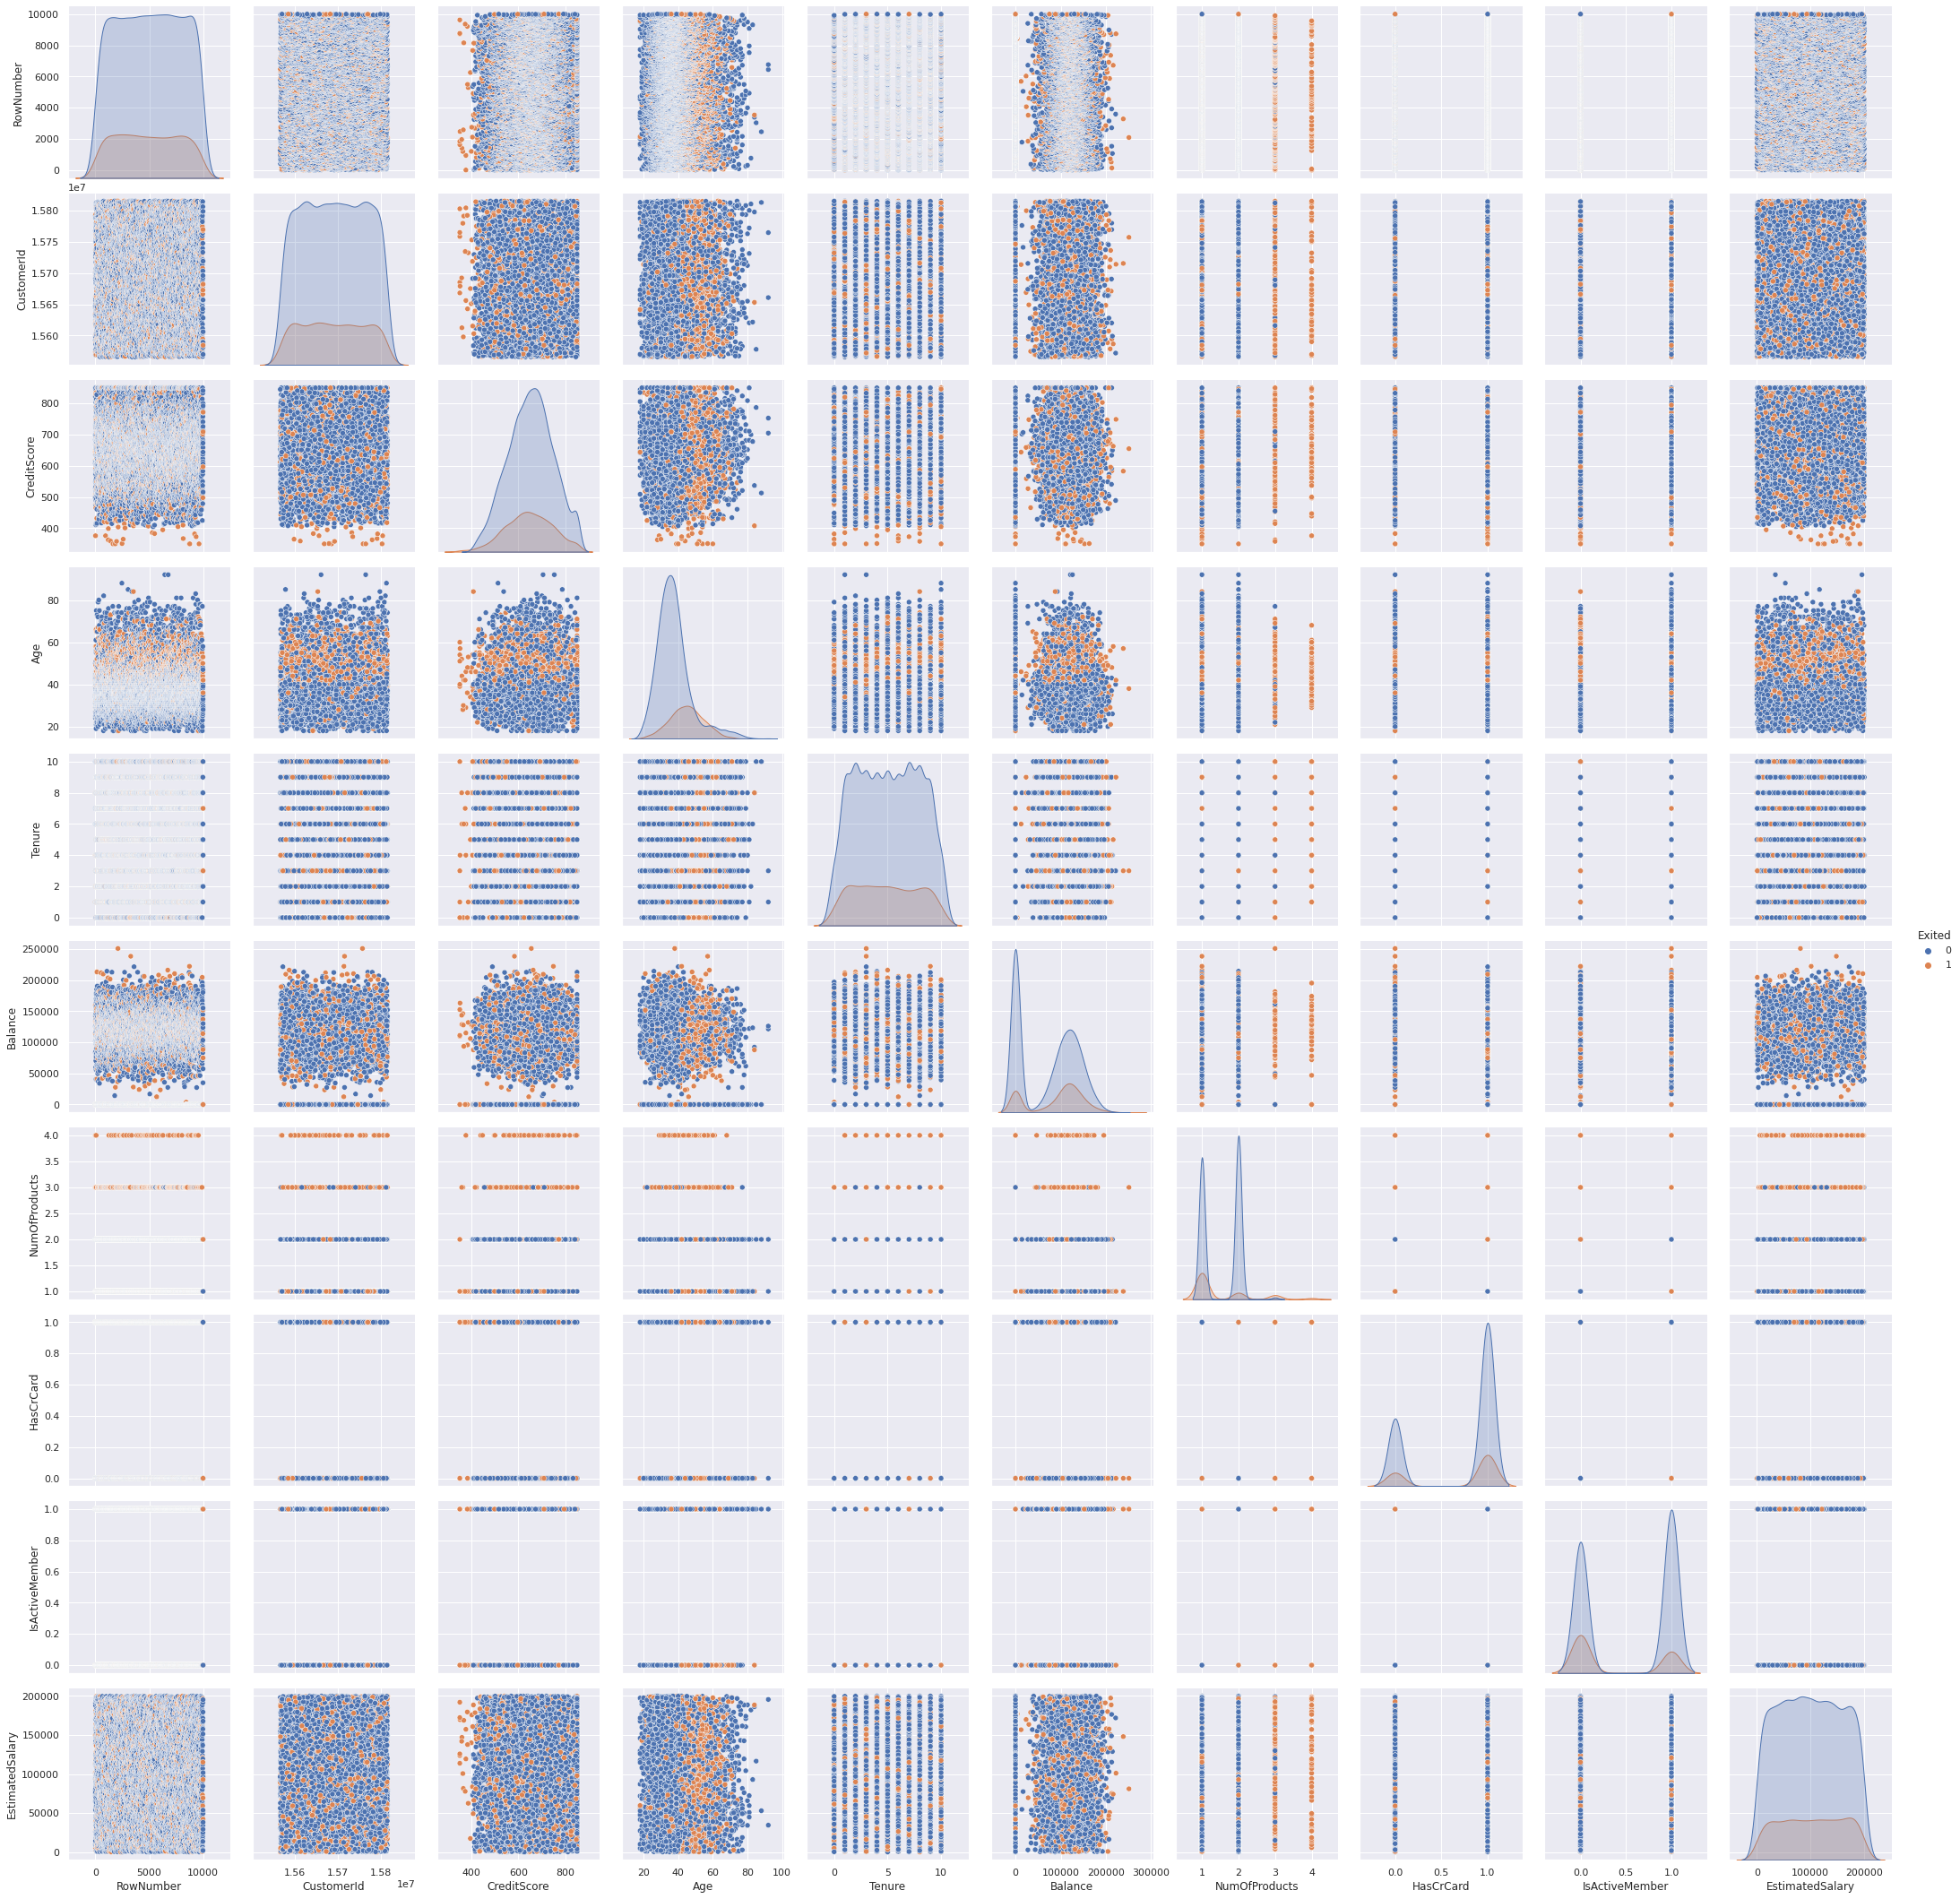

In [134]:
sns.pairplot(churn_df, height=3, diag_kind='kde',hue='Exited');

**Insights:**
- Not seeing linear relationship between the different variables
- IsActiveMember appears to have different distribution between Exited status
- Exited = 1 appears to have older customers than Exited = 0
- Balance has a different distributions between Exited status. Retained members have more zero balances

#### Review Correlation Heat Map

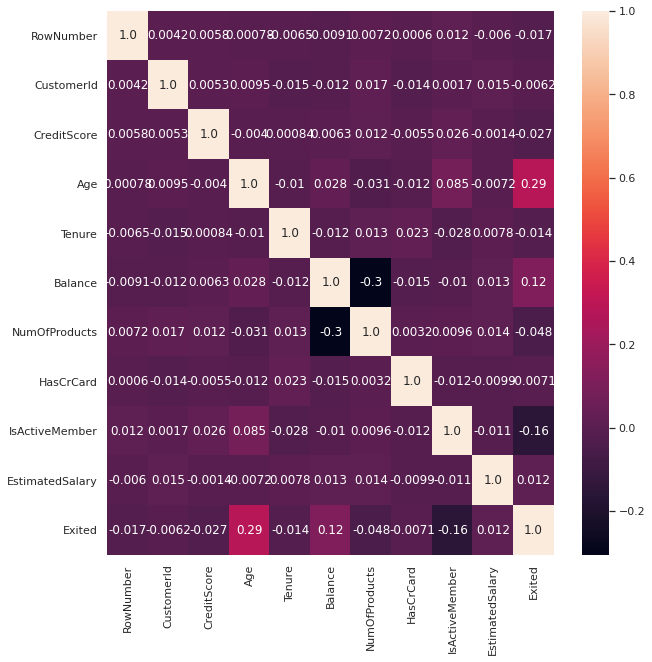

In [135]:
plt.figure(figsize=(10,10))
sns.heatmap(churn_df.corr(), annot=True, fmt=".2")
plt.show()

**Insights:**
- Exited and age seems to have some correlation
- variables are not very correlated

### Reviews crosstab of categorical varibles with proportion of Exited

In [136]:
pd.crosstab(churn_df['Geography'],churn_df['Exited'],normalize='index')

Exited            0         1
Geography                    
France     0.838452  0.161548
Germany    0.675568  0.324432
Spain      0.833266  0.166734

**Insights:**
- Customers in Germany are twice as likely to exit than in France and Spain. Geography should be a predictive variable

In [137]:
pd.crosstab(churn_df['Gender'],churn_df['Exited'],normalize='index')

Exited         0         1
Gender                    
Female  0.749285  0.250715
Male    0.835441  0.164559

**Insights:**
- Females more likely to exit than Males

In [138]:
pd.crosstab(churn_df['Tenure'],churn_df['Exited'],normalize='index')

Exited         0         1
Tenure                    
0       0.769976  0.230024
1       0.775845  0.224155
2       0.808206  0.191794
3       0.788900  0.211100
4       0.794742  0.205258
5       0.793478  0.206522
6       0.797311  0.202689
7       0.827821  0.172179
8       0.807805  0.192195
9       0.783537  0.216463
10      0.793878  0.206122

**Insights:**
- Not seeing any major insights in regards to tenure

In [139]:
pd.crosstab(churn_df['NumOfProducts'],churn_df['Exited'],normalize='index')

Exited                0         1
NumOfProducts                    
1              0.722856  0.277144
2              0.924183  0.075817
3              0.172932  0.827068
4              0.000000  1.000000

**Insights:**
- Members with only one product are much likely to exit. This varible could have predictive power

In [140]:
pd.crosstab(churn_df['HasCrCard'],churn_df['Exited'],normalize='index')

Exited            0         1
HasCrCard                    
0          0.791851  0.208149
1          0.798157  0.201843

**Insights:**
- no major insights with a member having a credit card or not

In [141]:
pd.crosstab(churn_df['IsActiveMember'],churn_df['Exited'],normalize='index')

Exited                 0         1
IsActiveMember                    
0               0.731491  0.268509
1               0.857309  0.142691

**Insights:**
- a nonactive member is more likely to exit than an active member

### Review the continous variables using distribrution plots

In [142]:
#Creating Fuction to plot continous varible distributions 
def cont_plot(feature): 
    
    sns.distplot(churn_df[churn_df['Exited']==0][feature],color='g',label='Retained Customer', bins=31)
    sns.distplot(churn_df[churn_df['Exited']==1][feature],color='r',label='Exited Customer', bins=31)
    plt.legend()
    plt.show()

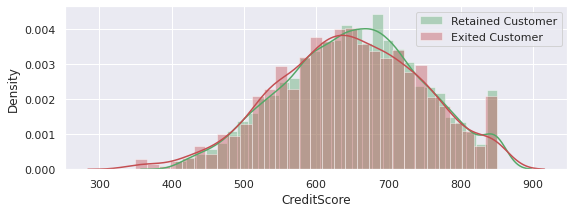

In [143]:
cont_plot('CreditScore')

**Insights:**
- Retained Customer and Exited customer have similar distributions

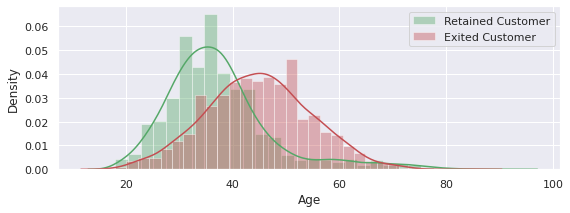

In [144]:
cont_plot('Age')

**Insights:**
- Exited Customers have an older distribution than Retained Customers

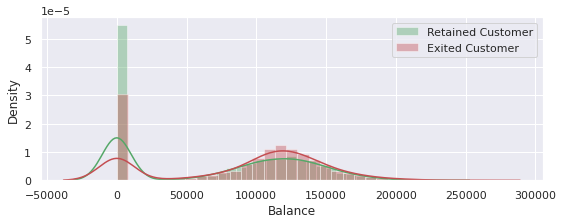

In [145]:
cont_plot('Balance')

**Insights:**
- Retained customers have high proportion of zero balances than exited customers

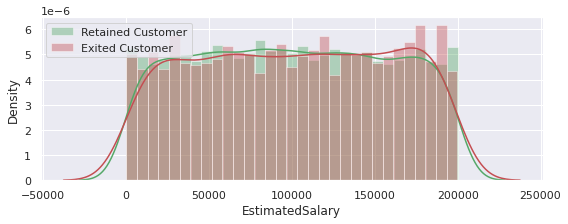

In [146]:
cont_plot('EstimatedSalary')

**Insights:**
- Retained and Exited Customers have very similar salary distributions

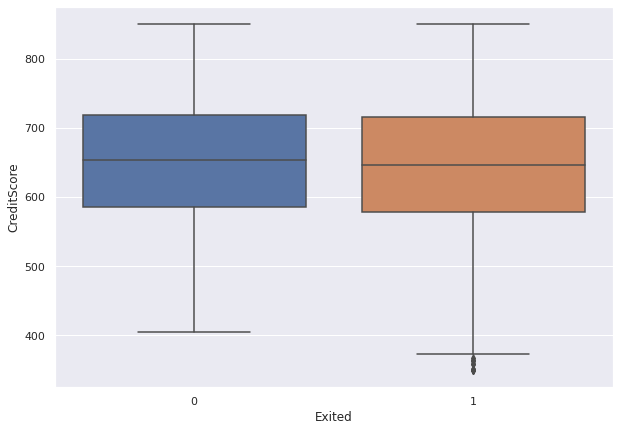

In [147]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="CreditScore", x="Exited", data=churn_df, orient="vertical");

**Insights:**
- Exited and Retained customers have similar credit score distributions

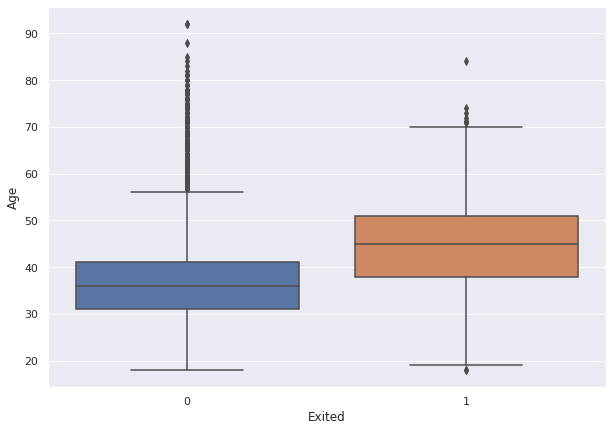

In [148]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Age", x="Exited", data=churn_df, orient="vertical");

**Insights:**
- Exited members clearly have an older population

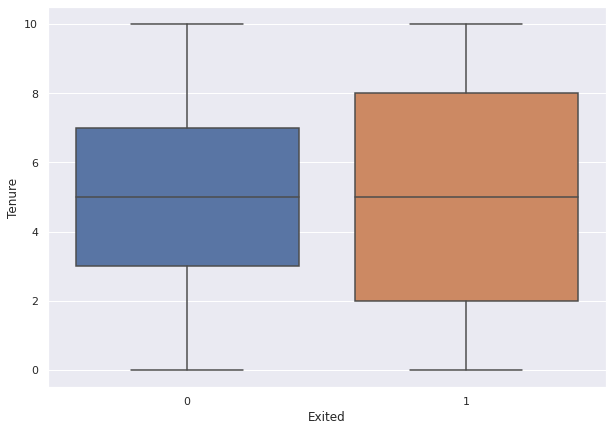

In [149]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Tenure", x="Exited", data=churn_df, orient="vertical");

**Insights:**
- Exited customers have a more variance in tenure than Retained customers

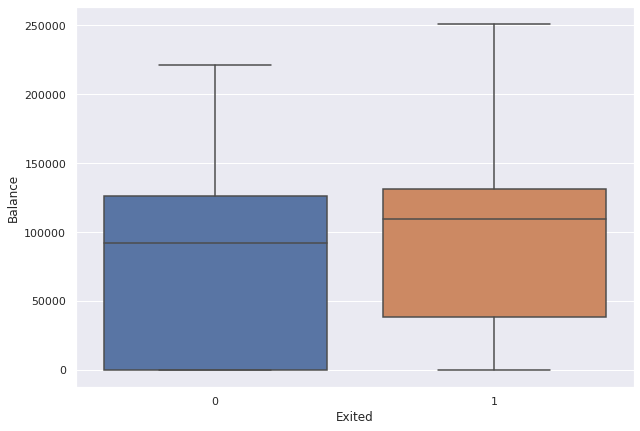

In [150]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Balance", x="Exited", data=churn_df, orient="vertical");

**Insights:**
- As previously mentioned retained customers have more zero balances

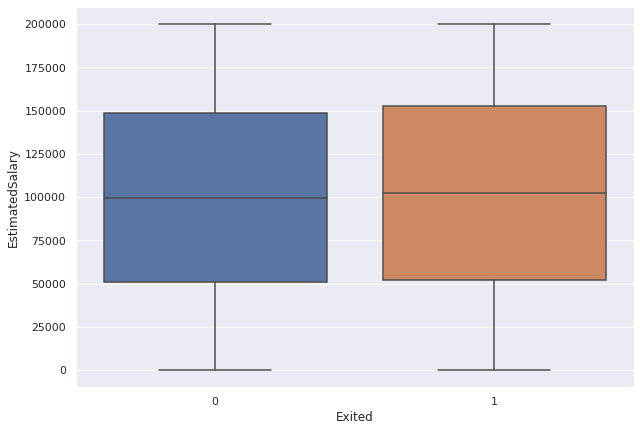

In [151]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="EstimatedSalary", x="Exited", data=churn_df, orient="vertical");

**Insights:**
- Exited and Retained customers have similar Salary distributions

### Create customer profile by Exited status

In [152]:
churn_df.groupby(['Exited']).mean()

RowNumber    CustomerId  ...  IsActiveMember  EstimatedSalary
Exited                             ...                                 
0       5024.694964  1.569117e+07  ...        0.554565     99738.391772
1       4905.917526  1.569005e+07  ...        0.360825    101465.677531

[2 rows x 10 columns]

- Retained members are younger, maintain lower balances, are more active than Exited members

## Additional Deep Dives

#### Since Age, Balance and Geography appear to be predictive variables. Deeper dive into understanding them is required

Age

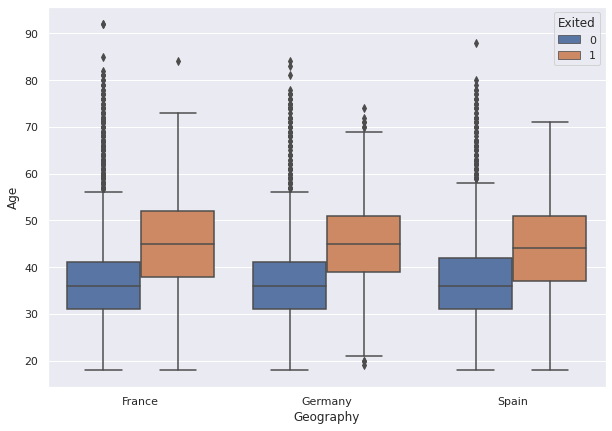

In [153]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Age", x="Geography", data=churn_df, orient="vertical",hue='Exited');

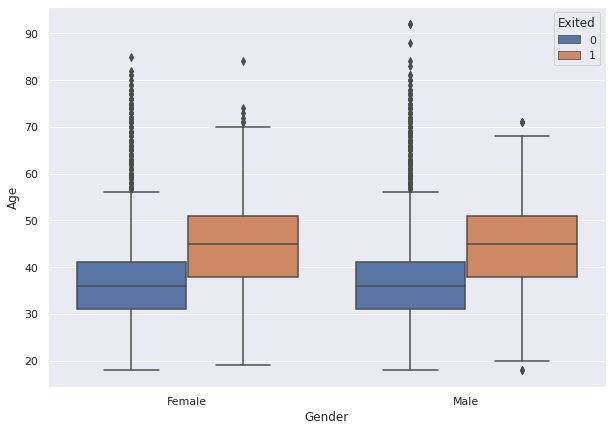

In [154]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Age", x="Gender", data=churn_df, orient="vertical",hue='Exited');

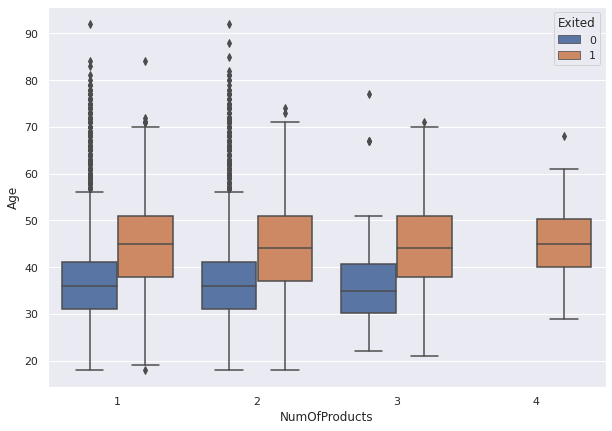

In [155]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Age", x="NumOfProducts", data=churn_df, orient="vertical",hue='Exited');

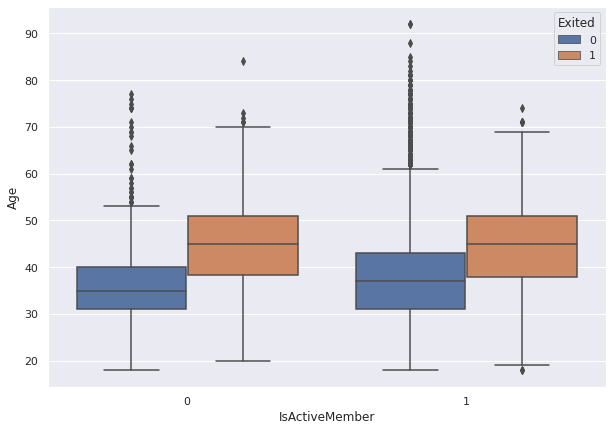

In [156]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Age", x="IsActiveMember", data=churn_df, orient="vertical",hue='Exited');

In [157]:
churn_df.pivot_table('Age',index=['Geography','Exited'],aggfunc=['mean','count'])

mean count
                        Age   Age
Geography Exited                 
France    0       37.235966  4204
          1       45.133333   810
Germany   0       37.311504  1695
          1       44.894349   814
Spain     0       37.839147  2064
          1       44.147700   413

**Insights:**
- The main insight is that Germany is an older population
- I was unable to obtain any insights from the other vies. The Age boxplots looked similar across the different dimensions

Balance

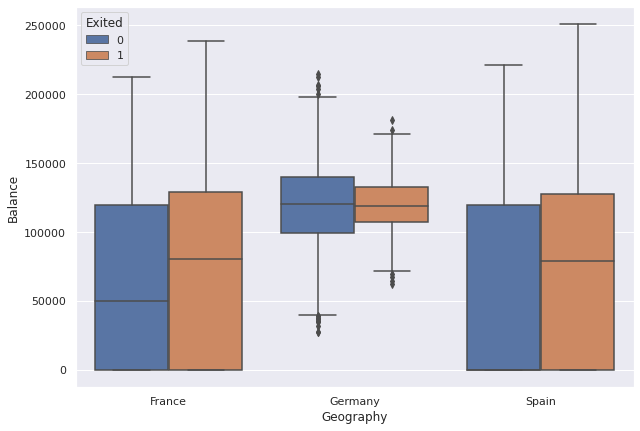

In [158]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Balance", x="Geography", data=churn_df, orient="vertical",hue='Exited');

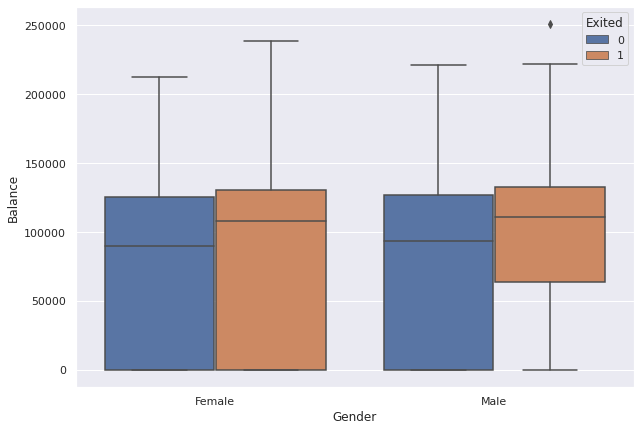

In [159]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Balance", x="Gender", data=churn_df, orient="vertical",hue='Exited');

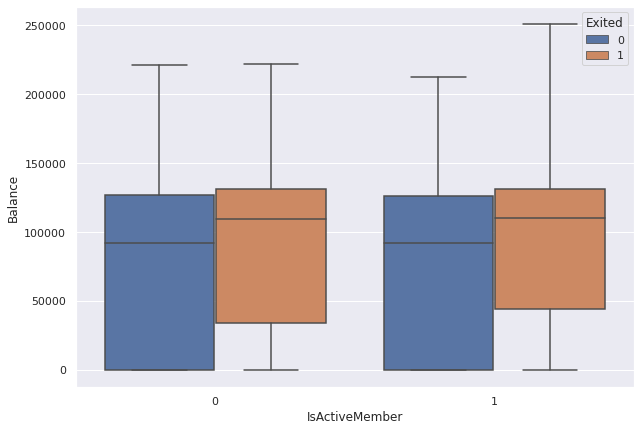

In [160]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Balance", x="IsActiveMember", data=churn_df, orient="vertical",hue='Exited');

**Insights:**
- Customers from Germany do not have any zero balances. Why is this? Will need to ask a domain expert
- Males that exited have less zero balance

Geography

In [161]:
churn_df.groupby(['Geography']).mean()

RowNumber    CustomerId  ...  EstimatedSalary    Exited
Geography                             ...                           
France     5025.228560  1.569065e+07  ...     99899.180814  0.161548
Germany    5000.278996  1.569056e+07  ...    101113.435102  0.324432
Spain      4950.667743  1.569192e+07  ...     99440.572281  0.166734

[3 rows x 11 columns]

**Insights:**
- Germany has older customers with higher balances and 32% Exit rate. This exited rate is almost twice as high as France and Spain. A follow-up would be to understand Germany products and customer base better to see what is leading to higher balances and Exit rate

### Data Pre-processing
Prepare the data for analysis - Missing value Treatment, Outlier Detection(treat, if needed- why or why not ), Feature Engineering, Prepare data for modeling

**Insights:**

In [162]:
churn_df.info() #check data again

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  int64   
 1   CustomerId       10000 non-null  int64   
 2   Surname          10000 non-null  category
 3   CreditScore      10000 non-null  int64   
 4   Geography        10000 non-null  category
 5   Gender           10000 non-null  category
 6   Age              10000 non-null  int64   
 7   Tenure           10000 non-null  int64   
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  int64   
 10  HasCrCard        10000 non-null  int64   
 11  IsActiveMember   10000 non-null  int64   
 12  EstimatedSalary  10000 non-null  float64 
 13  Exited           10000 non-null  int64   
dtypes: category(3), float64(2), int64(9)
memory usage: 1001.7 KB


In [163]:
data=churn_df.copy() #make copy of data before manipulations

**Create Maps to the bins for different variables**

In [164]:
#Map for Gender to make it numeric
gender_map={'Male':1,
         'Female':0}

**Remap Variables**

In [165]:
data['Gender'].replace(gender_map,inplace=True)

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  int64   
 1   CustomerId       10000 non-null  int64   
 2   Surname          10000 non-null  category
 3   CreditScore      10000 non-null  int64   
 4   Geography        10000 non-null  category
 5   Gender           10000 non-null  int64   
 6   Age              10000 non-null  int64   
 7   Tenure           10000 non-null  int64   
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  int64   
 10  HasCrCard        10000 non-null  int64   
 11  IsActiveMember   10000 non-null  int64   
 12  EstimatedSalary  10000 non-null  float64 
 13  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(10)
memory usage: 1.0 MB


**One hot encoding for Select category variables**

In [167]:
# Create one hot encoding

oneHotCols=["Geography"]

In [168]:
data=pd.get_dummies(data, columns=oneHotCols,drop_first=True)

**Check to see all the data types are numeric before model building**

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   RowNumber          10000 non-null  int64   
 1   CustomerId         10000 non-null  int64   
 2   Surname            10000 non-null  category
 3   CreditScore        10000 non-null  int64   
 4   Gender             10000 non-null  int64   
 5   Age                10000 non-null  int64   
 6   Tenure             10000 non-null  int64   
 7   Balance            10000 non-null  float64 
 8   NumOfProducts      10000 non-null  int64   
 9   HasCrCard          10000 non-null  int64   
 10  IsActiveMember     10000 non-null  int64   
 11  EstimatedSalary    10000 non-null  float64 
 12  Exited             10000 non-null  int64   
 13  Geography_Germany  10000 non-null  uint8   
 14  Geography_Spain    10000 non-null  uint8   
dtypes: category(1), float64(2), int64(10), uint8(2)
memory

**Insights:**
- All the variables are numerical besides Surname which will be dropped in the next step

**Drop unneeded variables**

In [170]:
data.drop(["RowNumber",'CustomerId','Surname'] , axis=1,inplace=True)

**Insights:**
- RowNumber, CustomerID, and Surname are identifiers that don't have any predictive power or are generic variabels

## Split the target variable and predictors - Split the data into train and test - Rescale the data

In [171]:
# Spliting the target data
X_data = data.drop(columns=['Exited'])

y_data = data['Exited']

In [172]:
#printing the shape of the data 
print(y_data.shape)
print(X_data.shape)

(10000,)
(10000, 11)


In [173]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(2)
memory usage: 722.8 KB


**Insights:**
- Have 11 independent variables

In [174]:
# Scaling the data set before modeling
scaler=StandardScaler()
subset=X_data.copy()
subset_scaled=scaler.fit_transform(subset) 

In [175]:
subset_scaled
subset_scaled_df=pd.DataFrame(subset_scaled,columns=subset.columns)

In [176]:
subset_scaled_df

CreditScore    Gender  ...  Geography_Germany  Geography_Spain
0       -0.326221 -1.095988  ...          -0.578736        -0.573809
1       -0.440036 -1.095988  ...          -0.578736         1.742740
2       -1.536794 -1.095988  ...          -0.578736        -0.573809
3        0.501521 -1.095988  ...          -0.578736        -0.573809
4        2.063884 -1.095988  ...          -0.578736         1.742740
...           ...       ...  ...                ...              ...
9995     1.246488  0.912419  ...          -0.578736        -0.573809
9996    -1.391939  0.912419  ...          -0.578736        -0.573809
9997     0.604988 -1.095988  ...          -0.578736        -0.573809
9998     1.256835  0.912419  ...           1.727904        -0.573809
9999     1.463771 -1.095988  ...          -0.578736        -0.573809

[10000 rows x 11 columns]

In [177]:
subset_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  float64
 1   Gender             10000 non-null  float64
 2   Age                10000 non-null  float64
 3   Tenure             10000 non-null  float64
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  float64
 6   HasCrCard          10000 non-null  float64
 7   IsActiveMember     10000 non-null  float64
 8   EstimatedSalary    10000 non-null  float64
 9   Geography_Germany  10000 non-null  float64
 10  Geography_Spain    10000 non-null  float64
dtypes: float64(11)
memory usage: 859.5 KB


###Splitting the Data into train and test set


In [178]:
X_train, X_test, y_train, y_test = train_test_split(subset_scaled_df, y_data, test_size = 0.2, random_state = 8)

In [179]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


### Create Model

Model 1: basic DNN Model

 For Model will be a basic model with 1 hidden layer with 8 nodes. Also, since this is a binary class the output will be of class 1

In [180]:
#initialize the model
model = Sequential()

# Creating input layer and first hiden layer
model.add(Dense(units=8, input_dim = 11,activation='relu'))   # input of 11 columns as shown above
# hidden layer
model.add(Dense(1,activation='sigmoid'))                        # binary classification for Churn or not

# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#create model summary 
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 8)                 96        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


 Training [Forward pass and Backpropagation]

In [181]:

#fitting the model
history=model.fit(X_train,y_train,batch_size=20,epochs=100,validation_split=0.2 )

Epoch 1/100
320/320 [==============================] - 2s 3ms/step - loss: 0.7461 - accuracy: 0.5341 - val_loss: 0.5356 - val_accuracy: 0.7688
Epoch 2/100
320/320 [==============================] - 1s 2ms/step - loss: 0.4866 - accuracy: 0.8055 - val_loss: 0.4921 - val_accuracy: 0.7806
Epoch 3/100
320/320 [==============================] - 1s 2ms/step - loss: 0.4386 - accuracy: 0.8171 - val_loss: 0.4779 - val_accuracy: 0.7856
Epoch 4/100
320/320 [==============================] - 1s 2ms/step - loss: 0.4283 - accuracy: 0.8187 - val_loss: 0.4706 - val_accuracy: 0.7956
Epoch 5/100
320/320 [==============================] - 1s 2ms/step - loss: 0.4440 - accuracy: 0.8025 - val_loss: 0.4636 - val_accuracy: 0.7931
Epoch 6/100
320/320 [==============================] - 1s 2ms/step - loss: 0.4082 - accuracy: 0.8264 - val_loss: 0.4530 - val_accuracy: 0.8006
Epoch 7/100
320/320 [==============================] - 1s 2ms/step - loss: 0.4168 - accuracy: 0.8256 - val_loss: 0.4413 - val_accuracy: 0.8044

Plotting the train and test loss

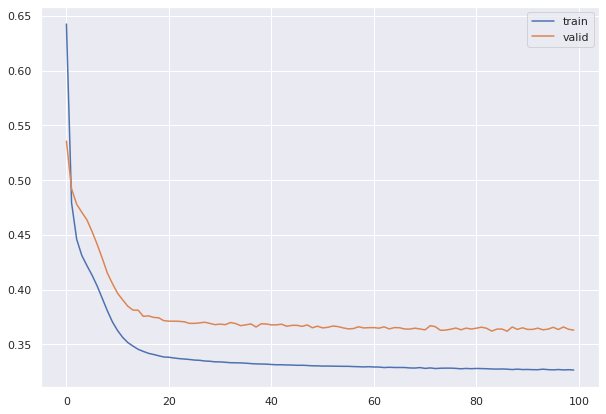

In [182]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

### Evaluation

Lets evalute the 1st model against the test data

In [183]:
score = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3394 - accuracy: 0.8630


In [184]:
print(1-sum(y_test)/len(y_test),"would have been accuracy if we guessed all 0s")

0.7935 would have been accuracy if we guessed all 0s


The model did better than if we would have guessed zero on all of the for all the predictions.Also,there doesn't appear to be any severe overfitting

### Functions to create Confusion Matrix and Scoring Metrics 

In [185]:

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

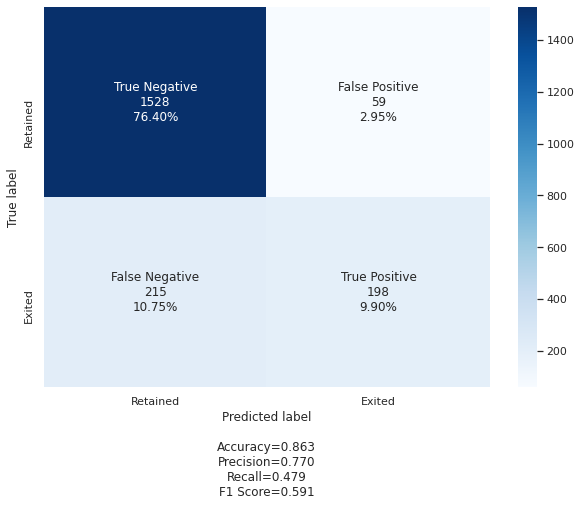

In [186]:
## Confusion Matrix 
import seaborn as sn
y_pred1 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Retained','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

**Insights:**
- The accurracy score is ok, but really would like to improve recall. Right now, we are missing 50% of the customers who churned. So, this model can improve

## Review ROC Curve to see the optimal threshold
- I am going to use the geometeric mean of sensitviy and precision as the function to maximize. The reason why is that i want a mix of the two measures and this will improve recall. 

Best Threshold=0.231908, G-Mean=0.797


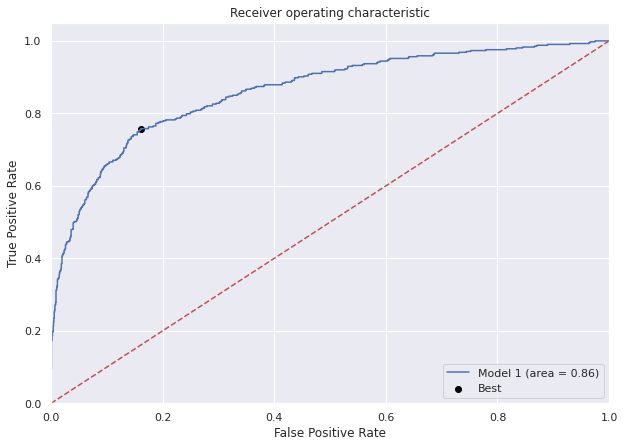

In [187]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

DNN_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))


# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))


plt.figure()

plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.plot(fpr, tpr, label='Model 1 (area = %0.2f)' % DNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

**Insights:**
- The threshold value to maximize the G-mean is 0.231908. Also, we can tell the model didn't do terrible and does quite better than random. Below, will create a confusion matrix using this threshold

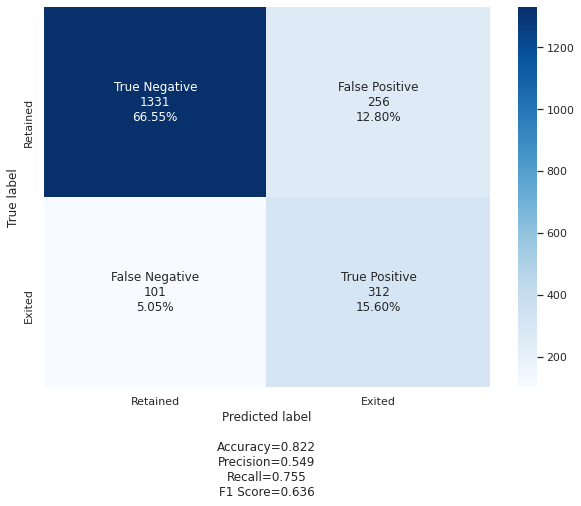

In [197]:

y_pred1 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.231908:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Retained','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')


**Insights:**
- Changing the threshold from 0.5 to 0.231908 improved the recall from 0.479 to 0.755. The accuracy went down a from about 0.86 to 0.82. 

#### A mixture of recall and precision is the goal. The reason is that we don't want to spend too much money on marketing for retention by targeting everyone, but we also don't want to miss the customers who are high risk of exiting.

Model2
- For improvement from model1, will use class weight since data set is imbalance and this should help with recall. Also, going to add a couple more layer with dropout

In [189]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), np.array([y_train.iloc[i] for i in range(len(y_train))]))
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.6273525721455459, 1: 2.4630541871921183}

In [190]:
#initialize the model
model2 = Sequential()

# Creating input layer and first hiden layer
model2.add(Dense(units=8, input_dim = 11,activation='relu',kernel_initializer='he_normal'))   # input of 11 columns as shown above


model2.add(Dense(units=8,activation='relu',kernel_initializer='he_normal'))
# hidden layer
model2.add(Dense(1,activation='sigmoid'))                        # binary classification for Churn or not



# Create optimizer with default learning rate
# Compile the model
model2.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

#create model summary 
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 8)                 96        
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________


 Training [Forward pass and Backpropagation]

In [191]:

#fitting the model
history=model2.fit(X_train,y_train,batch_size=20,epochs=100,validation_split=0.2 ,class_weight=class_weights)

Epoch 1/100
320/320 [==============================] - 2s 3ms/step - loss: 0.8527 - accuracy: 0.6723 - val_loss: 0.6616 - val_accuracy: 0.6206
Epoch 2/100
320/320 [==============================] - 1s 2ms/step - loss: 0.6610 - accuracy: 0.6124 - val_loss: 0.6318 - val_accuracy: 0.6269
Epoch 3/100
320/320 [==============================] - 1s 2ms/step - loss: 0.6260 - accuracy: 0.6325 - val_loss: 0.6154 - val_accuracy: 0.6356
Epoch 4/100
320/320 [==============================] - 1s 2ms/step - loss: 0.6047 - accuracy: 0.6619 - val_loss: 0.6067 - val_accuracy: 0.6594
Epoch 5/100
320/320 [==============================] - 1s 2ms/step - loss: 0.5957 - accuracy: 0.6685 - val_loss: 0.5756 - val_accuracy: 0.6931
Epoch 6/100
320/320 [==============================] - 1s 2ms/step - loss: 0.5819 - accuracy: 0.6962 - val_loss: 0.5757 - val_accuracy: 0.6956
Epoch 7/100
320/320 [==============================] - 1s 2ms/step - loss: 0.5600 - accuracy: 0.7013 - val_loss: 0.5769 - val_accuracy: 0.7044

Plotting the train and test loss

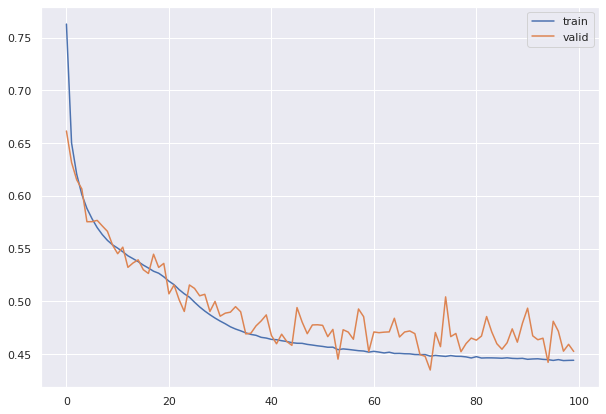

In [192]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

### Evaluation

Lets evalute the second model against the test data

In [193]:
score = model2.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.4505 - accuracy: 0.7940


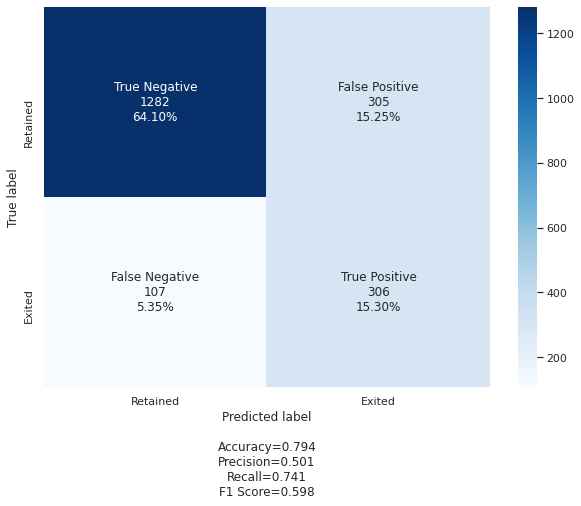

In [194]:
## Confusion Matrix 
import seaborn as sn
y_pred1 = model2.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Retained','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

## Review ROC Curve to see the optimal threshold
- I am going to use the geometeric mean of sensitviy and precision as the function to maximize. The reason why is that i want a mix of the two measure. 

Best Threshold=0.514440, G-Mean=0.778


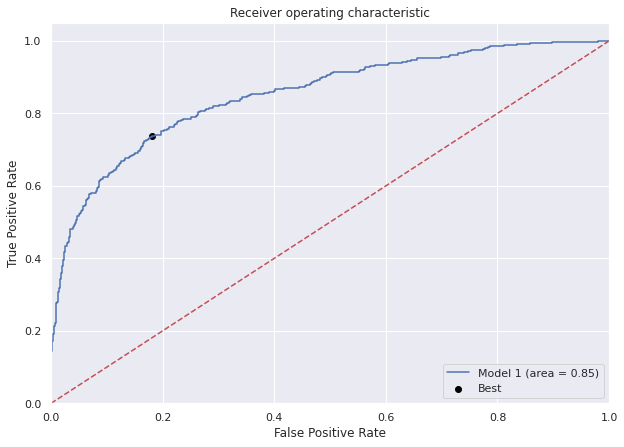

In [195]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

DNN_roc_auc = roc_auc_score(y_test, model2.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model2.predict(X_test))

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))


# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))


plt.figure()

plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.plot(fpr, tpr, label='Model 1 (area = %0.2f)' % DNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

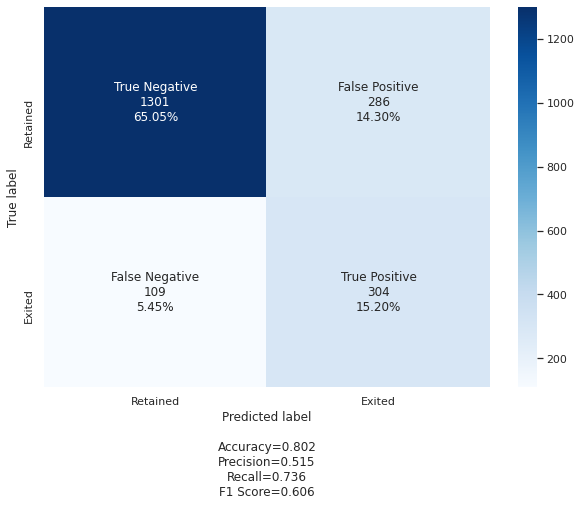

In [198]:

y_pred1 = model2.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.514440:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Retained','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')


## Conclusion

### Confusion Matrix

*True Positive (observed=1,predicted=1):*

Predicted Exiter and the customer is actually a Exiter.

*False Positive (observed=0,predicted=1):*

Predicted Exiter and the customer is not a Exiter.

*True Negative (observed=0,predicted=0):*

Predicted not an Exiter and the customer is not an Exiter.

*False Negative (observed=1,predicted=0):*

Predicted not an Exiter and the customer is a Exiter.

### `Important Metric`

The important Metric is recall. The bank will want keep as many customers as possible which means we want the least amount of  **False Negatives**. Other words target the as many people as possible who are predicted to leave. With this being said, we also need to balance the **False Positives** as we don't want to spend too much money on marketing. The focus should be on recall sense it minimizes False Negatives


### Important Features

Country, Age and balance are important features with this data

### Final Summary

The analysis used 11 independent variables. The first DNN model used a hidden layer with 8 nodes making use of relu for hidden layer and Sigmond for output layer. The initial accuracy of model was 86% with recall of 48%. Since the recall was low or false negatives were high, ROC threshold was optimized with a geometric mean of sensitivy and precision. Once a new threshold was found, the recall on model improved from 48% to 76%. 

Even though this was a big improvement, a model 2 was built using class weights to handle the imbalance data. Also, increased hidden layers to two. 
The second model accuracy was 79% and recall was 74% without using theshold optimization. This was a substantial improvement in recall compared to the first model without thresold optimization. The second model with optimized threshold had accuracy of 80% and recall of 74%. Overall, there wasn't dramatic improvement between the model. With only 10k observations of data it is hard to develop the best model. I would recommend to try other methods such as logistic regression or a ensemble method. Also, I recommend gather more data

### Business Recommendations
- Recommend the bank to use model 1 with optimized threshold for target marketing of members likely to exit.
- Also, i would recommed optimizing models with an equation of profit, so threshold can personalized for bank based on total profit
